# 首先导入必要的包：
numpy：python第三方库，用于科学计算
matplotlib:python第三方库，主要用于进行可视化
sklearn:python的重要机器学习库，其中封装了大量的机器学习算法，如：分类、回归、降维以及聚类


In [21]:
import numpy as np
from matplotlib import colors
from sklearn import svm
from sklearn.svm import SVC
from sklearn import model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl

# Step1.数据准备
(1)从指定路径下加载数据
(2)对加载的数据进行数据分割，x_train,x_test,y_train,y_test分别表示训练集特征、训练集标签、测试集特征、测试集标签


In [22]:
#*************将字符串转为整型，便于数据加载transform  the  dtype  from  string  into  integer***********************
def iris_type(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]


#load  data
data_path = './datasets/iris.data'  #数据文件的路径。注意修改路径
data = np.loadtxt(data_path,  #数据文件路径
                  dtype=float,  #数据类型
                  delimiter=',',  #数据分隔符
                  converters={4: iris_type})  #将第5列使用函数iris_type进行转换
#print(data)                                                                                                  #data为二维数组，data.shape=(150,  5)
#print(data.shape)
#数据分割
x, y = np.split(data,  #要切分的数组
                (4,),  #沿轴切分的位置，第5列开始往后为y
                axis=1)  #代表纵向分割，按列分割
x = x[:, 1:3]  #在X中我们取前两列作为特征，为了后面的可视化。x[:,0:4]代表第一维(行)全取，第二维(列)取0~2
#print(x)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,  #所要划分的样本特征集
                                                                    y,  #所要划分的样本结果
                                                                    random_state=1,  #随机数种子
                                                                    test_size=0.3)  #测试样本占比



# Step2.模型搭建
C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。  C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。
kernel='linear'时，为线性核
decision_function_shape='ovr'时，为one  v  rest，即一个类别与其他类别进行划分，
decision_function_shape='ovo'时，为one  v  one，即将类别两两之间进行划分，用二分类的方法模拟多分类的结果。


In [23]:
#**********************Model  via  SVM　method*************************
def classifier():
    #clf  =  svm.SVC(C=0.8,kernel='rbf',  gamma=50,decision_function_shape='ovr')
    clf = svm.SVC(C=0.2,  #误差项惩罚系数,默认值是1
                  kernel='linear',  #线性核  kenrel="rbf":高斯核
                  decision_function_shape='ovr')  #决策函数
    return clf


#  2.定义模型：SVM模型定义
#clf  =  classifier()
clf = svm.SVC(C=0.5, kernel='rbf')


# Step3.模型训练

In [24]:
#***********************Training  model  *****************************
def train(clf, x_train, y_train):
    clf.fit(x_train,  #training  feature
            y_train.ravel())  #  training  label


#  3.training  the  SVM  model
train(clf, x_train, y_train)



# Step4.模型评估

In [25]:
#**************Judge  wether  a    and  b  is  equal.  To  computer  the  accueacy  value.*************
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print('%s  Accuracy:%.3f' % (tip, np.mean(acc)))


def print_accuracy(clf, x_train, y_train, x_test, y_test):
    #  score(x_train,y_train):denote  the  accuracy  on  model  of  x_train,y_train
    print('trianing  prediction:%.3f' % (clf.score(x_train, y_train)))
    print('test  data  prediction:%.3f' % (clf.score(x_test, y_test)))
    #原始结果与预测结果进行对比      predict()表示对x_train样本进行预测，返回样本类别
    ###on  training  dataset
    show_accuracy(clf.predict(x_train), y_train, 'traing  data')
    ###  on  text  dataset
    show_accuracy(clf.predict(x_test), y_test, 'testing  data')
    #计算决策函数的值，表示x到各分割平面的距离
    print('decision_function:\n', clf.decision_function(x_train))



# Step5.模型使用

grid_test:
 [[2.         1.        ]
 [2.         1.02964824]
 [2.         1.05929648]
 ...
 [4.4        6.84070352]
 [4.4        6.87035176]
 [4.4        6.9       ]]
the  distance  to  decision  plane:
 [[ 2.19708942  0.87358871 -0.15174756]
 [ 2.19726697  0.8746476  -0.15286771]
 [ 2.19738191  0.87584638 -0.15396082]
 ...
 [-0.15774848  0.88166138  2.19721463]
 [-0.15703655  0.88287492  2.19629867]
 [-0.15630774  0.88414976  2.19534442]]
grid_hat:
 [0. 0. 0. ... 2. 2. 2.]


C:\Users\qurui\anaconda3\envs\mlexp\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


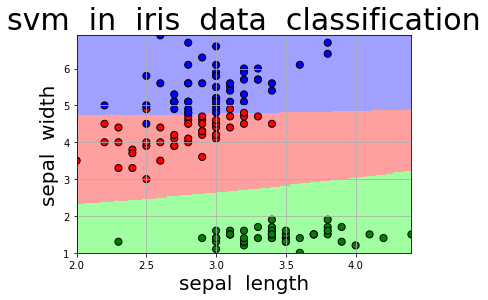

In [26]:
def draw(clf, x):
    iris_feature = 'sepal  length', 'sepal  width', 'petal  lenght', 'petal  width'
    #  begin  draw
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  #The  min  and  max  value  of  the  first  coloum
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  #The  min  and  max  value  of  the  second  coloum
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  #to  show  samples
    grid_test = np.stack((x1.flat, x2.flat), axis=1)  #stack():沿着新的轴加入一系列数组
    print('grid_test:\n', grid_test)
    #  distance  between  data  to  the  hyperplane
    z = clf.decision_function(grid_test)
    print('the  distance  to  decision  plane:\n', z)

    grid_hat = clf.predict(grid_test)  #  predict  result【0,0,  ....,  2,2,2】
    print('grid_hat:\n', grid_hat)
    grid_hat = grid_hat.reshape(x1.shape)  #  reshape  grid_hat和x1形状一致
    #若3*3矩阵e，则e.shape()为3*3,表示3行3列      

    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)  #  pcolormesh(x,y,z,cmap)这里参数代入
    #  x1，x2，grid_hat，cmap=cm_light绘制的是背景。
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), edgecolor='k', s=50, cmap=cm_dark)  #  样本点
    plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolor='none', zorder=10)  #  测试点
    plt.xlabel(iris_feature[0], fontsize=20)
    plt.ylabel(iris_feature[1], fontsize=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('svm  in  iris  data  classification', fontsize=30)
    plt.grid()
    plt.show()


#  5.applying  model
draw(clf, x)

